### Logistic Regression Practice
I ran a code to brush upon my ML skills. <br>
Python Version: 3.12.2 

In [57]:
# everything that needs to be imported to run the code. 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Logistic Regression Model
class LogisticRegression:
    def __init__(self, num_features):
        # Initialize weights and bias to zeros
        self.w = np.zeros(num_features)
        self.b = 0
    
    def predict_proba(self, X):
        # Calculate linear combination z = w * X + b
        print(np.dot(X,self.w))
        z = np.dot(X, self.w) + self.b
        # Apply sigmoid to get probability
        return sigmoid(z)
    
    def predict(self, X):
        # Convert probabilities to binary predictions (0 or 1)
        proba = self.predict_proba(X)
        return [1 if p >= 0.5 else 0 for p in proba]
    
    def Loss(self, X,gt,epsilon):
        y_hat = np.clip(self.predict_proba(X),epsilon,1-epsilon)
        return [-np.mean(gt*np.log(y_hat) + (1-gt)*np.log(1-y_hat))]
    
    def updateweights(self, X, gt, y_hat, alpha):
        self.w = self.w - alpha * 1/len(y_hat) * np.dot(X.T,y_hat-gt)
        self.b = self.b -  alpha * np.mean(y_hat - gt)

    def evaluate(self,X,gt):
        y_pred = self.predict(X)
        return np.mean(y_pred==gt)*100

# Sigmoid function for predictions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [50]:
# Sample dataset with features and binary labels
X_train = np.array([
    [2, 3],
    [1, -1],
    [0, 2],
    [-1, -2],
    [3, 1]
])

y_train = np.array([1, 0, 1, 0, 1])  # Ground truth labels

#sample test data
X_test = np.array([
    [2, 3],
    [1, -1],
    [0, 2],
    [-1, -2],
    [3, 1],
    [-1, 3],
    [2, -1]
])

y_test = np.array([1, 0, 1, 0, 1, 0, 0])  # Ground truth labels

# Using a larger test dataset
X_test_large = np.array([
    [2, 3],
    [1, -1],
    [0, 2],
    [-1, -2],
    [3, 1],
    [-1, 3],
    [2, -1],
    [4, 2],
    [-3, -3],
    [3, -2],
    [2, 2],
    [0, 1],
    [-2, 1],
    [1, 3],
    [-1, -3]
])

y_test_large = np.array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [51]:
# Initialize the model for 2 features
model = LogisticRegression(num_features=2)
L = []

for i in range(50):
    y_pred = model.predict_proba(X_train)
    Loss =  model.Loss(X_train,y_train,epsilon = 1e-15)
    L.append(Loss)
    model.updateweights(X_train,y_train,y_pred,1)

accuracy = model.evaluate(X_train,y_train)

print("Model acuracy on training data is {acc:.2f}%".format(acc=accuracy))



Model acuracy on training data is 100.00%


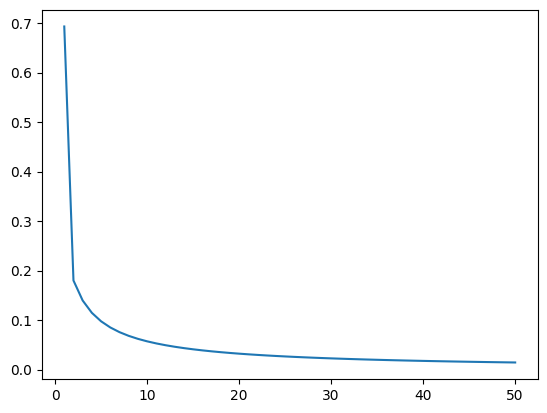

In [52]:
# Observing loss over iteractions
x = np.linspace(1,len(L))
plt.plot(x,L)

In [53]:
test_acc = model.evaluate(X_test,y_test)
print("Model acuracy on test data is {acc:.2f}%".format(acc=test_acc))


Model acuracy on test data is 85.71%


In [54]:
large_test_acc = model.evaluate(X_test_large,y_test_large)
print("Model acuracy on larger test data is {acc:.2f}%".format(acc=large_test_acc))

Model acuracy on larger test data is 86.67%


In [55]:
# Logistic Regression Model with L2 Regularization
class LogisticRegression_L2:
    def __init__(self, num_features):
        # Initialize weights and bias to zeros
        self.w = np.zeros(num_features)
        self.b = 0
    
    def predict_proba(self, X):
        # Calculate linear combination z = w * X + b
        z = np.dot(X, self.w) + self.b
        # Apply sigmoid to get probability
        return sigmoid(z)
    
    def predict(self, X):
        # Convert probabilities to binary predictions (0 or 1)
        proba = self.predict_proba(X)
        return [1 if p >= 0.5 else 0 for p in proba]
    
    def Loss(self, X,gt,epsilon,lam):
        y_hat = np.clip(self.predict_proba(X),epsilon,1-epsilon)
        return [-1 * (np.mean(gt*np.log(y_hat) + (1-gt)*np.log(1-y_hat)) + lam/(2*len(y_hat)) * np.dot(self.w,self.w))]
    
    def updateweights(self, X, gt, y_hat, alpha,lam):
        self.w = self.w - alpha * (1/len(y_hat) * np.dot(X.T,y_hat-gt) + lam/len(y_hat)*self.w)
        self.b = self.b -  alpha * np.mean(y_hat - gt)

    #get accuracy percentage
    def evaluate(self,X,gt):
        y_pred = self.predict(X)
        return np.mean(y_pred==gt)*100

In [56]:
# Initialize the model with L2 regulaization for 2 features
model2 = LogisticRegression_L2(num_features=2)
for i in range(50):
    y_pred = model2.predict_proba(X_train)
    Loss =  model2.Loss(X_train,y_train,epsilon = 1e-15, lam=1)
    L.append(Loss)
    model2.updateweights(X_train,y_train,y_pred,1,lam=1)

model2_acc = model2.evaluate(X_train,y_train)
print("Model (with L2) acuracy on training data is {acc:.2f}%".format(acc=model2_acc))

model2_acc_test = model2.evaluate(X_test_large,y_test_large)
print("Model (with L2) acuracy on large test data is {acc:.2f}%".format(acc=model2_acc_test))

Model (with L2) acuracy on training data is 100.00%
Model (with L2) acuracy on large test data is 86.67%
